Mounted at /content/drive


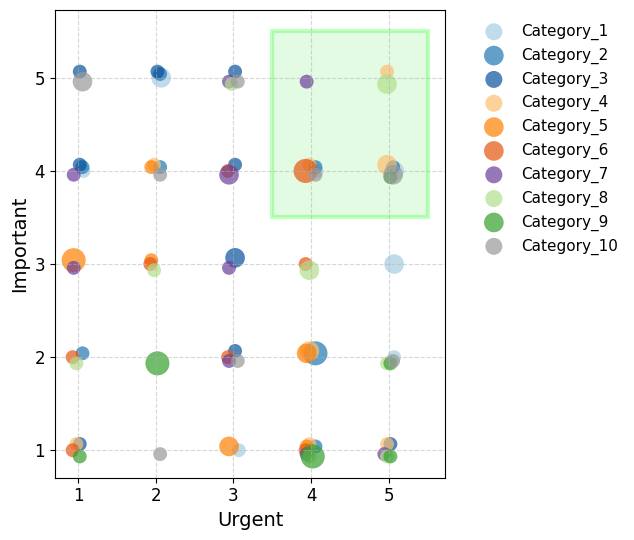

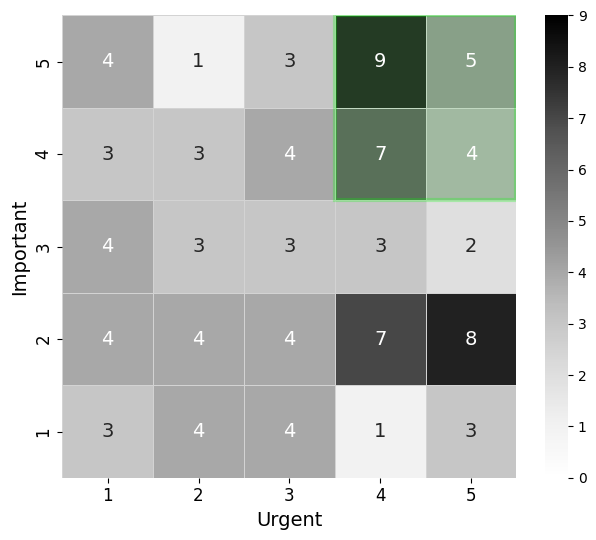

In [1]:
# 1. Google Drive 마운트

# 2. 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import seaborn as sns

# 3. 데이터 불러오기
df = pd.read_csv(file_path)

category_order = [f"Category_{i}" for i in range(1, 11)]

# 실제 데이터에 존재하는 카테고리만 필터링 (순서 유지)
unique_categories = [cat for cat in category_order if cat in df['Category'].unique()]


color_palette = [
    "#a6cee3", "#1f78b4", "#08519c",   # 1~3: 파랑 계열
    "#fdbf6f", "#ff7f00", "#e6550d",   # 4~6: 주황 계열
    "#6a3d9a",                         # 7: 보라
    "#b2df8a", "#33a02c",              # 8~9: 녹색 계열
    "#999999"                          # 10: 회색
]
category_colors = {
    cat: color_palette[i % len(color_palette)]
    for i, cat in enumerate(unique_categories)
}

# 5. 원형 오프셋 계산
n_categories = len(unique_categories)
angle_map = {cat: 2 * np.pi * i / n_categories for i, cat in enumerate(unique_categories)}
radius = 0.07
df['Urgent_shifted'] = df.apply(lambda r: r['Urgent'] + radius * np.cos(angle_map[r['Category']]), axis=1)
df['Important_shifted'] = df.apply(lambda r: r['Important'] + radius * np.sin(angle_map[r['Category']]), axis=1)

# 6. 버블 데이터 생성
df['Coord'] = list(zip(df['Important_shifted'], df['Urgent_shifted'], df['Category']))
bubble_data = df.groupby('Coord').size().reset_index(name='Count')
bubble_data[['Important_shifted', 'Urgent_shifted', 'Category']] = pd.DataFrame(bubble_data['Coord'].tolist(), index=bubble_data.index)

# 7. 버블 차트
plt.figure(figsize=(6.5, 5.5))
ax = plt.gca()

quad_rect = patches.Rectangle((3.5, 3.5), 2, 2, facecolor='lightgreen', edgecolor='lime', linewidth=3, alpha=0.25)
ax.add_patch(quad_rect)

for category in unique_categories:
    sub = bubble_data[bubble_data['Category'] == category]
    plt.scatter(
        sub['Urgent_shifted'],
        sub['Important_shifted'],
        s=sub['Count'] * 100,
        alpha=0.7,
        color=category_colors[category],
        edgecolors='none',
        label=category
    )

plt.xlabel("Urgent", fontsize=14)
plt.ylabel("Important", fontsize=14)
plt.xticks(range(1, 6), fontsize=12)
plt.yticks(range(1, 6), fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title="", bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=11, frameon=False)
plt.tight_layout()
plt.savefig("bubble_chart.png", dpi=300)
plt.show()

# 8. 히트맵
plt.figure(figsize=(6.5, 5.5))
heatmap_data = df.groupby(['Important', 'Urgent']).size().unstack(fill_value=0)
vmax = heatmap_data.values.max()

ax = sns.heatmap(
    heatmap_data,
    annot=True,
    fmt="d",
    cmap="Greys",
    cbar=True,
    linewidths=0.5,
    linecolor='lightgray',
    vmin=0,
    vmax=vmax,
    yticklabels=heatmap_data.index[::-1],
    annot_kws={"size": 14}
)

quad_rect = patches.Rectangle((3, 0), 2, 2, facecolor='lightgreen', edgecolor='lime', linewidth=3, alpha=0.25)
ax.add_patch(quad_rect)

plt.xlabel("Urgent", fontsize=14)
plt.ylabel("Important", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.savefig("heatmap.png", dpi=300)
plt.show()
